In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [4]:
def calculadora_de_montante_juros_compostos(valor_inicial, taxa, tempo_total_do_investimento, aporte = 0, escala = "M"):

    if escala in ["M", "A", "D"]:
        
        tempo_investido = 0

        vetor_montante_ao_longo_do_tempo = []

        while tempo_investido < tempo_total_do_investimento:

            if tempo_investido == 0:

                valor_final = valor_inicial + ((valor_inicial + aporte) * (taxa/100)) 

                tempo_investido = tempo_investido + 1

                vetor_montante_ao_longo_do_tempo.append(valor_final)

            else:

                valor_final = valor_final + (valor_final * (taxa/100)) + aporte

                tempo_investido = tempo_investido + 1

                vetor_montante_ao_longo_do_tempo.append(valor_final)
        
        return vetor_montante_ao_longo_do_tempo

    else:

        return('Escolha uma escala válida')

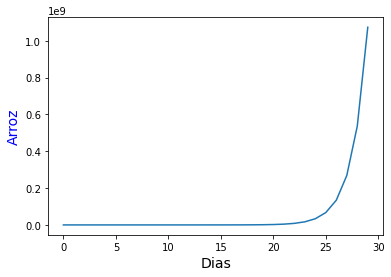

In [5]:
#arroz

arroz_ao_longo_do_tempo = calculadora_de_montante_juros_compostos(valor_inicial = 1, 
                                                                                taxa = 100, tempo_total_do_investimento = 30, 
                                                                                aporte = 0, escala = "D")

fig, ax = plt.subplots()

ax.plot(np.arange(0, 30, 1), arroz_ao_longo_do_tempo)
ax.set_xlabel("Dias",fontsize=14)
ax.set_ylabel("Arroz",color="blue",fontsize=14)

plt.show()

### Lógica 

Dois períodos -> 8 anos no primeiro e 22 anos no segundo.
O primeiro indivíduo investe pouco nos primeiros 8 e um pouco mais nos 22 restantes.  
O segundo indivíduo não investe nada nos 8 primeiros e aporta pesado nos 22 restantes.

Três simulações:

Variando o aporte nos primeiros 8 anos entre R$0 e R$ 5.000. Nos últimos 22 anos investe 5k por mês.
Variando o aporte nos últimos 22 anos entre R$5.000 e R$ 10.000, mas nos primeiros 8 anos investe R$ 300 reais por mês.
Variando o aporte do indíviduo que escolhe não investir para ganhar mais entre R$10.000 e R$15.000 nos 22 anos restantes. 



In [6]:
#variando os primeiros 8 anos

aporte_variavel = range(0, 5000)

montante_final_primeiro_periodo_variavel = []


for aporte in aporte_variavel:


    montantes_estagiario_primeiro_periodo = calculadora_de_montante_juros_compostos(valor_inicial = 0, 
                                                                    taxa = 0.8, tempo_total_do_investimento = 96 #8 anos
                                                                    ,aporte = aporte, escala = "M")

    montantes_estagiario_segundo_periodo = calculadora_de_montante_juros_compostos(
                                                                    valor_inicial = montantes_estagiario_primeiro_periodo[-1], 
                                                                    taxa = 0.8, tempo_total_do_investimento = 264 #22 anos
                                                                    ,aporte = 5000, escala = "M")


    montante_final_estag = montantes_estagiario_segundo_periodo[-1]

    montante_final_primeiro_periodo_variavel.append(montante_final_estag)


In [7]:
aporte_variavel = range(5000, 10000)

montante_final_segundo_periodo_variavel = []


for aporte in aporte_variavel:


    montantes_estagiario_primeiro_periodo = calculadora_de_montante_juros_compostos(valor_inicial = 0, 
                                                                taxa = 0.8, tempo_total_do_investimento = 96 #8 anos
                                                                ,aporte = 300, escala = "M")

    montantes_estagiario_segundo_periodo = calculadora_de_montante_juros_compostos( 
                                                                        valor_inicial = montantes_estagiario_primeiro_periodo[-1], 
                                                                        taxa = 0.8, tempo_total_do_investimento = 264 #22 anos
                                                                        ,aporte = aporte, escala = "M")


    montante_final_estag = montantes_estagiario_segundo_periodo[-1]

    montante_final_segundo_periodo_variavel.append(montante_final_estag)

In [8]:
aporte_variavel = range(10000, 15000)

lista_montante_final_gerente = []


for aporte in aporte_variavel:


    montantes_gerente = calculadora_de_montante_juros_compostos(valor_inicial = 0, 
                                                            taxa = 0.8, tempo_total_do_investimento = 264 #22 anos, começou com 28
                                                            ,aporte = aporte, escala = "M")


    montante_final_gerente= montantes_gerente[-1]

    lista_montante_final_gerente.append(montante_final_gerente)

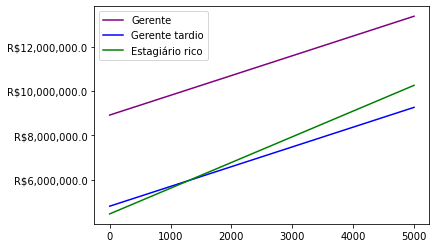

In [9]:
fig, ax = plt.subplots()

ax.plot(range(0, 5000), lista_montante_final_gerente, color = "purple", label = "Gerente")
ax.plot(montante_final_segundo_periodo_variavel, color = "blue", label = "Gerente tardio")
ax.plot(montante_final_primeiro_periodo_variavel, color = "green", label = "Estagiário rico")
ax.yaxis.set_major_formatter('R${x:,}')
ax.legend()

plt.show()

In [17]:
montantes_estagiario_primeiro_periodo = calculadora_de_montante_juros_compostos(valor_inicial = 0, 
                                                                        taxa = 0.8, tempo_total_do_investimento = 96
                                                                        ,aporte = 2500, escala = "M")

montantes_estagiario_segundo_periodo = calculadora_de_montante_juros_compostos(valor_inicial = montantes_estagiario_primeiro_periodo[-1], 
                                                                        taxa = 0.8, tempo_total_do_investimento = 264 
                                                                        ,aporte = 7500, escala = "M")

montante_ao_longo_do_tempo_estag = montantes_estagiario_primeiro_periodo + montantes_estagiario_segundo_periodo

montantes_gerente = calculadora_de_montante_juros_compostos(valor_inicial = 0, 
                                                            taxa = 0.8, tempo_total_do_investimento = 264
                                                            ,aporte = 12500, escala = "M")


montante_sem_aporte = list(np.zeros(96))

montante_final_gerente = montante_sem_aporte + montantes_gerente

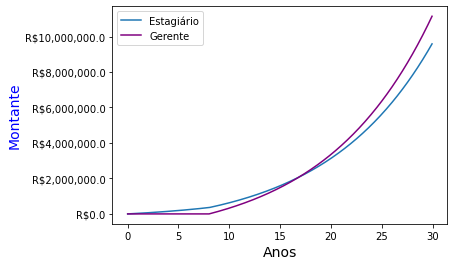

In [18]:
fig, ax = plt.subplots()

ax.plot(np.arange(0, 30, 0.0834), montante_ao_longo_do_tempo_estag, label = "Estagiário")
ax.plot(np.arange(0, 30, 0.0834), montante_final_gerente, color = "purple", label = "Gerente")
ax.set_xlabel("Anos",fontsize=14)
ax.set_ylabel("Montante",color="blue",fontsize=14)
ax.legend()
ax.yaxis.set_major_formatter('R${x:,}')

plt.show()